In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import pandas as pd

In [3]:
data = pd.read_csv("C:/Users/ernes/OneDrive/Documentos/BEDU/Machine Learning/data/Video_games_esrb_rating.csv")
data

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,2
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
1892,SPARC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1893,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [4]:
data.shape

(1895, 34)

Limpieza de datos

In [24]:
data.isna().sum().sum()

0

MATRIZ DE CONFUSION

In [5]:
x = data.iloc[:, 2:-1]
y = data.iloc[:, -1]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=1000)

In [7]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred = classifier.predict(x_test)

In [10]:
conf = confusion_matrix(y_pred, y_test)
conf

array([[103,   0,   5,   4],
       [  0,  88,   1,  11],
       [  2,   1,  85,  16],
       [  1,   9,  18, 130]], dtype=int64)

ÁRBOL DE DESICIÓN

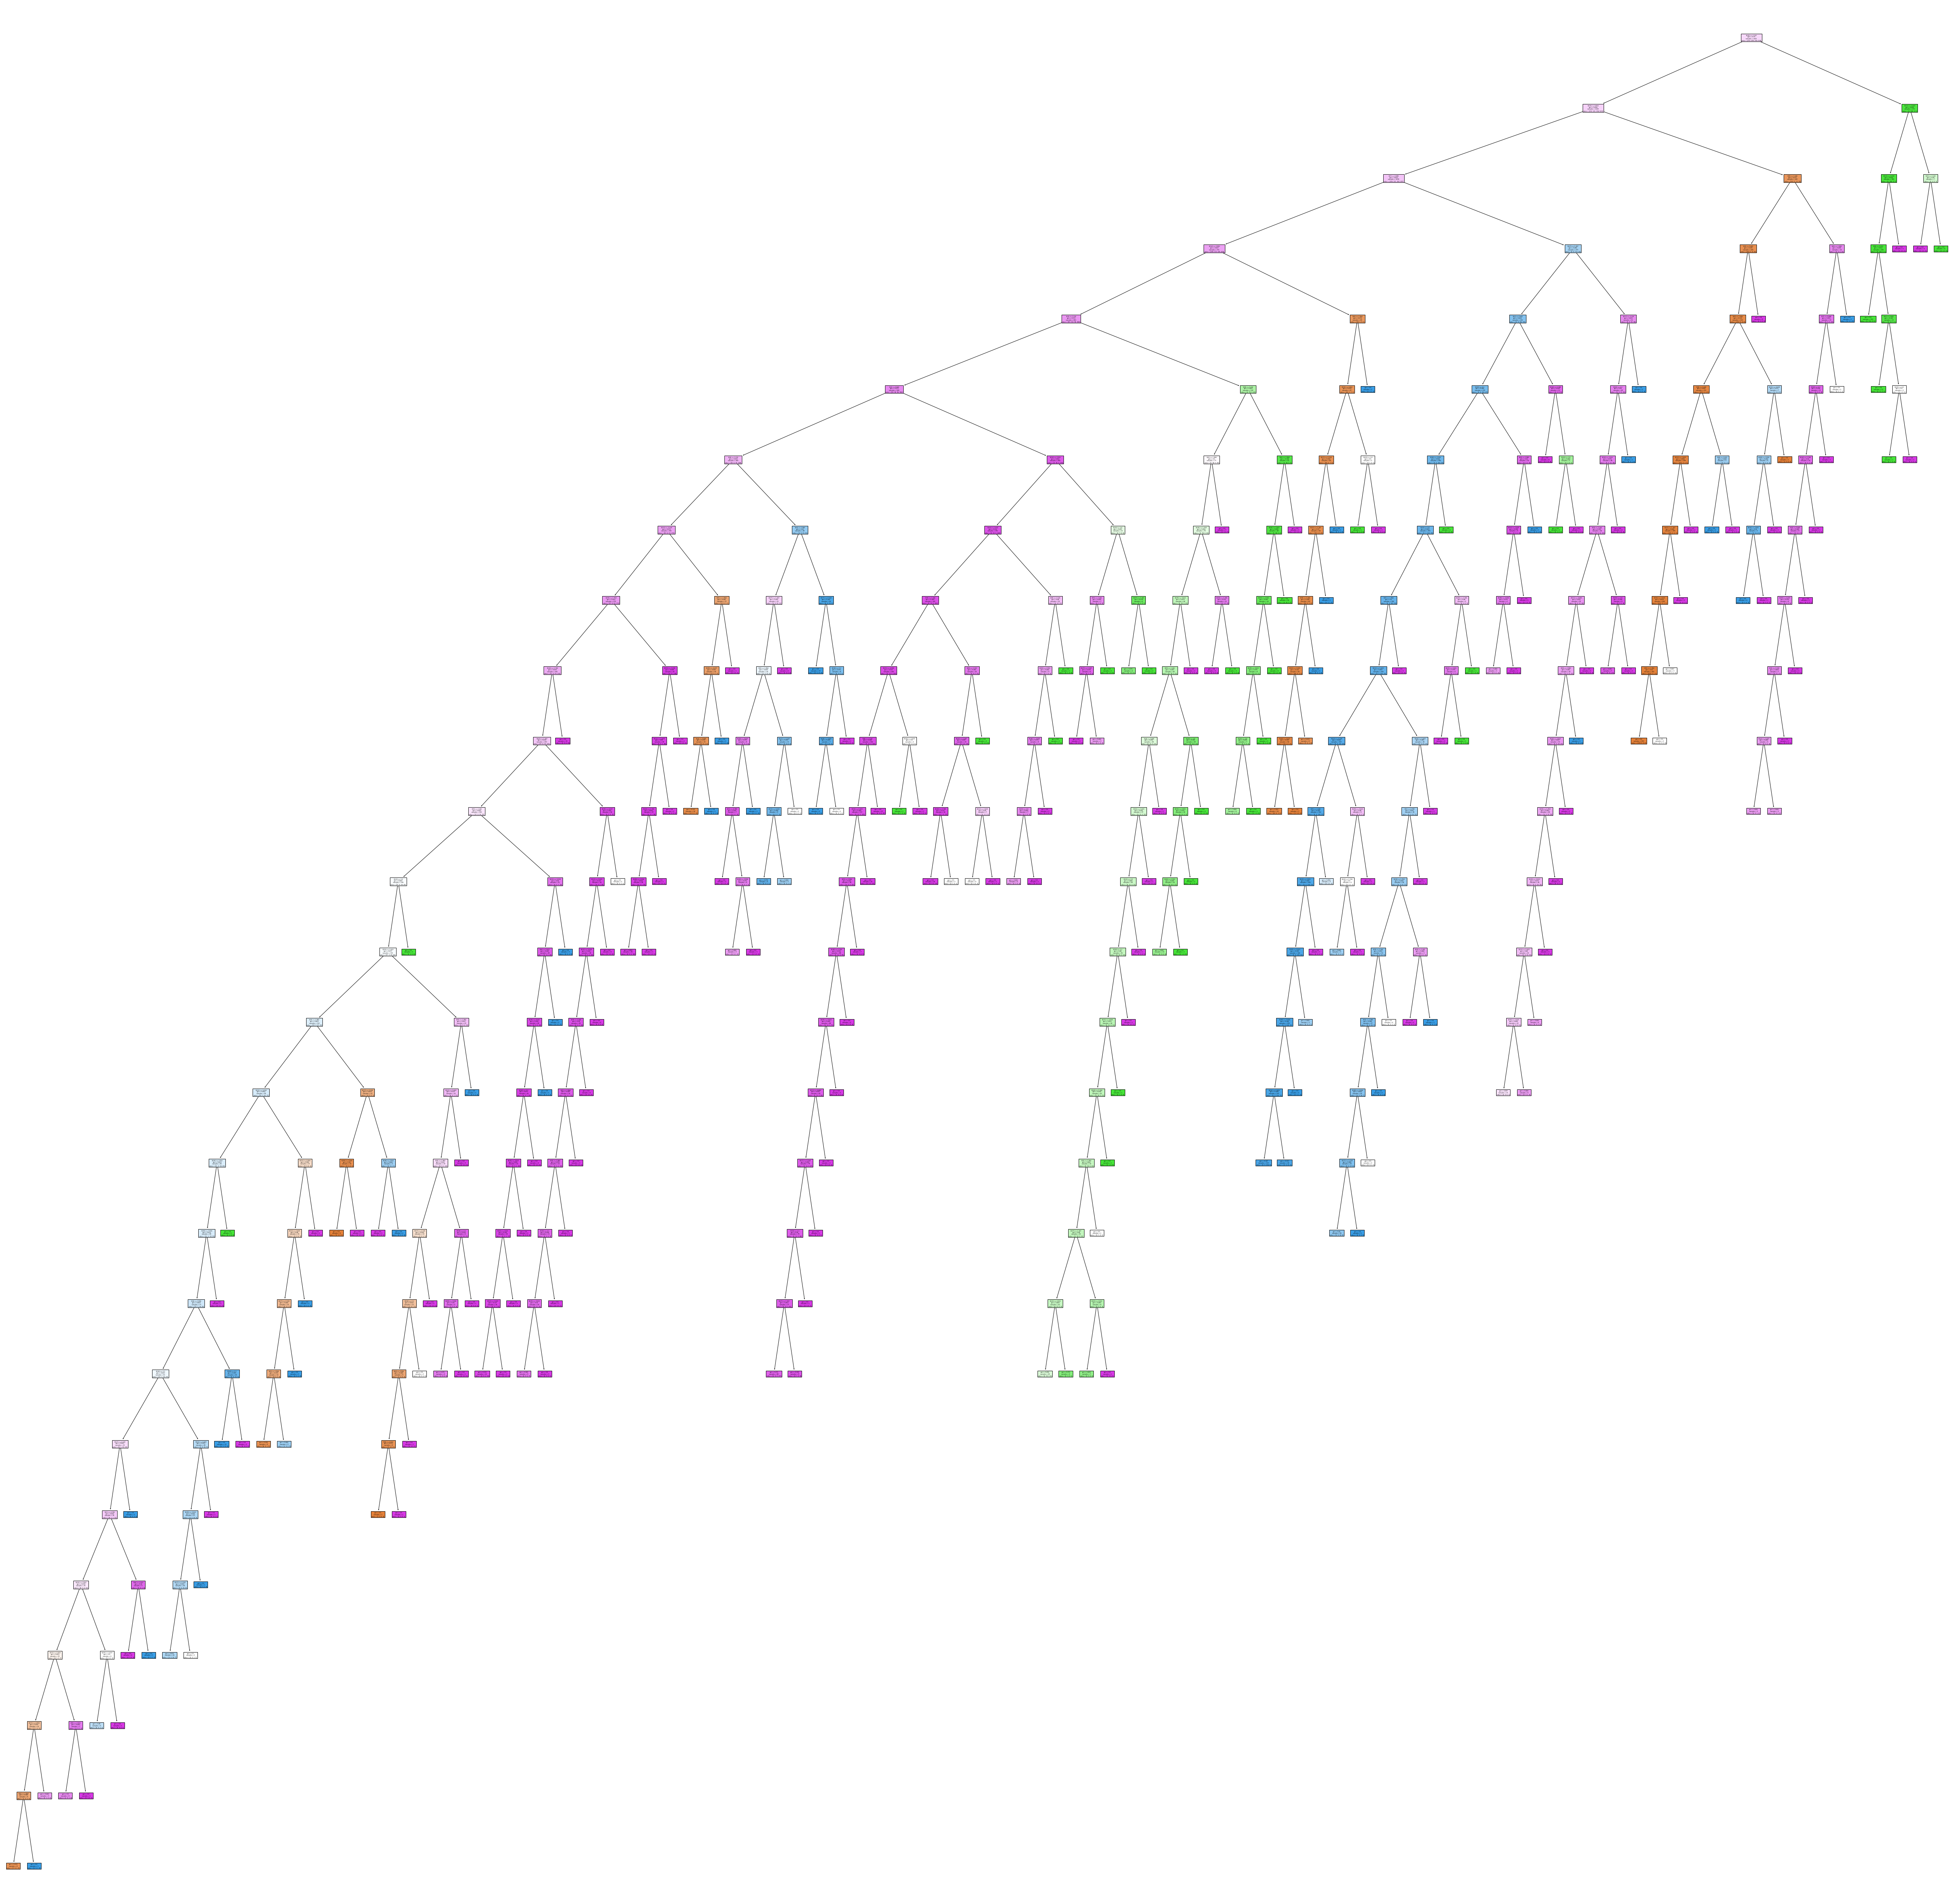

In [20]:
plt.figure(figsize=(90,90))
plot_tree(classifier, filled=True)
plt.show()

REGRESION LINEAL

In [34]:
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x, y, test_size = 0.30)

In [35]:
lin_model = LinearRegression()
lin_model.fit(x_train_r, y_train_r)

LinearRegression()

In [36]:
y_train_predict = lin_model.predict(x_train_r)
MSE = mean_squared_error(y_train_r,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(x_test_r)
MSE = (mean_squared_error(y_test_r, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =0.47184116067388404
Pruebas: MSE =0.5861928712778046


In [39]:
df_predicciones = pd.DataFrame({'valor_real':y_test_r, 'prediccion':y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(15)

,valor_real,prediccion
0,3,3.149551
1,2,2.134447
2,1,1.123589
3,2,1.987386
4,4,3.420757
5,2,3.339160
6,2,2.170184
7,2,3.339160
8,4,3.805591
9,3,2.947808
